In [1]:
#lani1023

import pandas as pd
import matplotlib.pyplot as plt

file_path = './data/atp_matches_till_2022.csv'
matches = pd.read_csv(file_path)

matches.tail()

# Gesamte Laufzeit: max. 10 min

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,4,209362,NaN,NaN,...,68.0,42.0,12.0,10.0,11.0,13.0,1103.0,9.0,1130.0,8.0
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,5,202065,NaN,NaN,...,56.0,40.0,20.0,15.0,4.0,8.0,808.0,23.0,1390.0,4.0
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NaN,NaN,...,54.0,29.0,8.0,11.0,6.0,10.0,1059.0,10.0,1881.0,1.0
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NaN,NaN,...,39.0,24.0,7.0,10.0,5.0,9.0,NaN,NaN,NaN,NaN
188160,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,4,208414,NaN,NaN,...,34.0,24.0,13.0,10.0,5.0,8.0,NaN,NaN,NaN,NaN


In [2]:
# matches = pd.read_csv('your_file.csv')

# Vorbereitung des DataFrames
matches['tourney_date'] = pd.to_datetime(matches['tourney_date'], format='%Y%m%d')
matches.sort_values(by=['tourney_date', 'match_num'], inplace=True)

In [3]:
def analyze_past_matches(player1, player2, date):
    """
    Diese Funktion analysiert die Spiele zwischen zwei Spielern vor einem bestimmten Datum
    und gibt zurück, ob der Spieler, der das letzte Spiel gewonnen hat, auch das nächste Spiel gewinnt.
    """
    past_matches = matches[((matches['winner_id'] == player1) & (matches['loser_id'] == player2)) |
                           ((matches['winner_id'] == player2) & (matches['loser_id'] == player1))]
    past_matches = past_matches[past_matches['tourney_date'] < date]

    if past_matches.empty:
        return None  # Keine vorherigen Spiele

    last_match = past_matches.iloc[-1]
    if last_match['winner_id'] == player1:
        return 1  # Spieler 1 hat das letzte Spiel gewonnen
    else:
        return 0  # Spieler 2 hat das letzte Spiel gewonnen

In [4]:
# Anwenden der Funktion auf jedes Match im DataFrame
matches['last_winner_wins_next'] = matches.apply(lambda row: analyze_past_matches(row['winner_id'], row['loser_id'], row['tourney_date']), axis=1)
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,last_winner_wins_next
1343,1968-9343,Bloemfontein,Hard,64,A,1968-01-08,238,109950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,1968-9343,Bloemfontein,Hard,64,A,1968-01-08,239,100011,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,1968-9343,Bloemfontein,Hard,64,A,1968-01-08,240,106867,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,1968-9343,Bloemfontein,Hard,64,A,1968-01-08,241,109914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,1968-9343,Bloemfontein,Hard,64,A,1968-01-08,242,107078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188002,2022-M-DC-2022-FLS-M-AUS-CRO-01,Davis Cup Finals SF: AUS vs CRO,Hard,2,D,2022-11-25,2,200282,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.0,1790.0,17.0,2105.0,0.0
188011,2022-M-DC-2022-FLS-M-ITA-CAN-01,Davis Cup Finals SF: ITA vs CAN,Hard,2,D,2022-11-26,1,132283,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,950.0,18.0,2075.0,0.0
188012,2022-M-DC-2022-FLS-M-ITA-CAN-01,Davis Cup Finals SF: ITA vs CAN,Hard,2,D,2022-11-26,2,200000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,4195.0,23.0,1865.0,1.0
188005,2022-M-DC-2022-FLS-M-CAN-AUS-01,Davis Cup Finals F: CAN vs AUS,Hard,2,D,2022-11-27,1,133430,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,2075.0,95.0,592.0,NaN


last_winner_wins_next
1.0    60.545488
0.0    39.454512
Name: proportion, dtype: float64

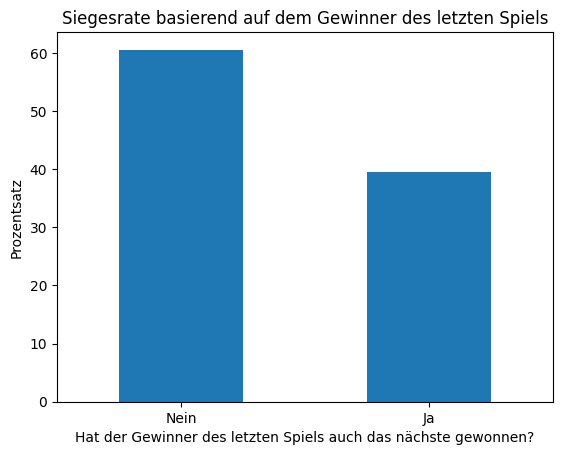

In [5]:
win_rate = matches['last_winner_wins_next'].value_counts(normalize=True) * 100
win_rate.plot(kind='bar', 
              title='Siegesrate basierend auf dem Gewinner des letzten Spiels', 
              xlabel='Hat der Gewinner des letzten Spiels auch das nächste gewonnen?',
              ylabel='Prozentsatz'
             )
plt.xticks(ticks=[0, 1], labels=['Nein', 'Ja'], rotation=0)

win_rate